In [2]:
import pandas as pd
import langid
from tqdm.auto import tqdm
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


## Langid

In [3]:
langid.set_languages(['uk', 'ru'])

In [4]:
uk_geo_light = pd.read_csv("../data/uk_geo_dataset_light.csv")
ru_geo_light = pd.read_csv("../data/ru_geo_dataset_light.csv")

In [5]:
uk_geo_light['lang'] = 'uk'
ru_geo_light['lang'] = 'ru'
geo_light = pd.concat([uk_geo_light, ru_geo_light]).reset_index(drop=True)

In [6]:
# geo_light['lang_pred'] = geo_light['text'].progress_apply(lambda x: langid.classify(x)[0])
geo_light['lang_pred'] = geo_light['text'].parallel_apply(lambda x: langid.classify(x)[0])

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

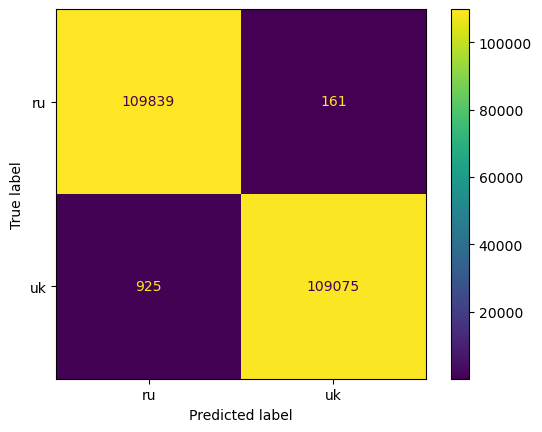

In [8]:
ConfusionMatrixDisplay.from_predictions(geo_light['lang'], geo_light['lang_pred'])

In [9]:
accuracy_score(geo_light['lang'], geo_light['lang_pred'])

/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

0.9950636363636364

In [10]:
wrong = (geo_light[geo_light['lang'] != geo_light['lang_pred']]).copy()
wrong

text loc_markers  \
270     –ö–∏—Ä–∏–ª–æ –®–µ–≤—á–µ–Ω–∫–æ –ø–µ—Ä–µ–±—É–≤–∞—Ç–∏–º–µ —É –°–®–ê —É–ø—Ä–æ–¥–æ–≤–∂ 8-...  [(31, 34)]   
402     –°–µ—Ä–µ–¥ –Ω–∞–π–ø–æ—à–∏—Ä–µ–Ω—ñ—à–∏—Ö –≤–∏–¥—ñ–≤ —Ä–æ—Å–ª–∏–Ω–Ω–æ–≥–æ –º–æ–ª–æ–∫–∞ ‚Äî...          []   
560     –ü–æ—Ç—ñ–º —Å—É–¥–¥—è –æ—Ç—Ä–∏–º–∞—î –¥–∑–≤—ñ–Ω–æ–∫ —ñ–∑ –ø—Ä–∏–±–ª–∏–∑–Ω–æ –Ω–∞—Å—Ç—É...          []   
906     ¬´–í –æ—Å–Ω–æ–≤–Ω–æ–º—É –ª—é–¥–∏ –ø—Ä–æ—Å—Ç–æ –Ω–µ –º–∞—é—Ç—å –±–∞–∂–∞–Ω–Ω—è, ‚Äì –≥...          []   
1021        –£ —Å–æ–±–æ—Ä—ñ –°–≤—è—Ç–æ–≥–æ –ü–∞–≤–ª–∞ –∑—ñ–±—Ä–∞–ª–∏—Å—è 2650 –≥–æ—Å—Ç–µ–π.          []   
...                                                   ...         ...   
216299  –ü—Ä–æ–≥—Ä–∞–º–º—É –ö–∞–Ω–Ω—Å–∫–æ–≥–æ –∫–∏–Ω–æ—Ñ–µ—Å—Ç–∏–≤–∞–ª—è –≤ 2013 –≥–æ–¥—É ...          []   
217677                                   –ú–∏—Ç–∏–Ω–≥–∏ 5 –º–∞—Ä—Ç–∞.          []   
217778  –ú—É–∂—á–∏–Ω—É, –Ω–∞–ø–∞–≤—à–µ–≥–æ –Ω–∞ –ø–∞—Å—Å–∞–∂–∏—Ä–∞ –ª–æ–Ω–¥–æ–Ω—Å–∫–æ–π –ø–æ–¥...          []   
218673  –ü–µ–≤–∏—Ü–∞ –ö–æ—Ä—Ç–Ω–∏ –õ–∞–≤ –∑–∞–≤–µ—Ä—à–∏–ª–∞ —Ä–∞–±–æ—Ç—É –Ω–∞–¥ —Å–≤–æ–∏–º–∏ ...          []   
219051  –ë—Ä–∏—Ç–∞–Ω—Å–∫–∞—è –ø–µ–≤–∏—Ü–∞ –ü–∏ –î–∂–µ–π –•–∞—Ä–≤–∏, –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–∞—è ...          []   

        is_valid lang lang_pred  
270            0   uk        ru  
402            0   uk        ru  
560            0   uk        ru  
906            0   uk        ru  
1021           0   uk        ru  
...          ...  ...       ...  
216299         0   ru        uk  
217677         0   ru        uk  
217778         0   ru        uk  
218673         0   ru        uk  
219051         0   ru        uk  

[1086 rows x 5 columns]

In [11]:
wrong['num_loc'] = wrong['text'].apply(len)

In [12]:
wrong.loc[560].text

'–ü–æ—Ç—ñ–º —Å—É–¥–¥—è –æ—Ç—Ä–∏–º–∞—î –¥–∑–≤—ñ–Ω–æ–∫ —ñ–∑ –ø—Ä–∏–±–ª–∏–∑–Ω–æ –Ω–∞—Å—Ç—É–ø–Ω–∏–º —Ç–µ–∫—Å—Ç–æ–º: ¬´–¥–æ–±—Ä—ã–π –¥–µ–Ω—å, —ç—Ç–æ –≤–∞—Å –∏–∑ –ú–ì–ë –î–ù–† (–≤–∞—Ä—ñ–∞–Ω—Ç–∏: –ú–í–î –õ–ù–†, –§–°–ë –†–§) –±–µ—Å–ø–æ–∫–æ—è—Ç.'

In [13]:
wrong.loc[270].text

'–ö–∏—Ä–∏–ª–æ –®–µ–≤—á–µ–Ω–∫–æ –ø–µ—Ä–µ–±—É–≤–∞—Ç–∏–º–µ —É –°–®–ê —É–ø—Ä–æ–¥–æ–≤–∂ 8-13 –ª–∏—Å—Ç–æ–ø–∞–¥–∞.'

–ü—Ä–∏–∫–ª–∞–¥ `402` —Ü—ñ–∫–∞–≤–∏–π, –±–æ –≤ –Ω—å–æ–º—É –∑—Ä–æ–∑—É–º—ñ—Ç–∏, —â–æ —Ü–µ —É–∫—Ä–∞—ó–Ω—Å—å–∫–∞, –º–æ–∂–Ω–∞ –ø—Ä–æ—Å—Ç–æ –ø–æ –≤—Ö–æ–¥–∂–µ–Ω–Ω—é –ª—ñ—Ç–µ—Ä "—î", "—ñ". –¶–µ –Ω–∞–≤–æ–¥–∏—Ç—å –Ω–∞ –¥—É–º–∫—É, —â–æ —Ä–æ—Å–ø—ñ–∑–Ω–∞–≤–∞–Ω–Ω—è –º–æ–∂–Ω–∞ –∑—Ä–æ–±–∏—Ç–∏ —Ç—Ä–æ—à–∫–∏ –∫—Ä–∞—â–µ. –¶–µ –º–æ–∂–µ –±—É—Ç–∏ –∫—Ä–∏—Ç–∏—á–Ω–∏–º, –±–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º—É —Å–µ—Ç—ñ —Ç–∞–∫–æ–∂ —î –º—ñ—Å–∫–ª–∞—Å–∏—Ñ—ñ–∫–æ–≤–∞–Ω—ñ —Å–µ–º–ª–∏, –¥–µ –ø–æ —ñ–¥–µ—ó —Å–∫–ª–∞–¥–Ω–æ—â–µ–π –Ω–µ –º–∞–ª–æ –± –≤–∏–Ω–∏–∫–∞—Ç–∏

In [14]:
wrong.loc[402].text

'–°–µ—Ä–µ–¥ –Ω–∞–π–ø–æ—à–∏—Ä–µ–Ω—ñ—à–∏—Ö –≤–∏–¥—ñ–≤ —Ä–æ—Å–ª–∏–Ω–Ω–æ–≥–æ –º–æ–ª–æ–∫–∞ ‚Äî —Å–æ—î–≤–µ, —Ä–∏—Å–æ–≤–µ, –º–∏–≥–¥–∞–ª—å–Ω–µ —Ç–∞ –∫–æ–∫–æ—Å–æ–≤–µ.'

In [15]:
wrong[wrong['lang_pred'] == 'ru']

text loc_markers  \
270     –ö–∏—Ä–∏–ª–æ –®–µ–≤—á–µ–Ω–∫–æ –ø–µ—Ä–µ–±—É–≤–∞—Ç–∏–º–µ —É –°–®–ê —É–ø—Ä–æ–¥–æ–≤–∂ 8-...  [(31, 34)]   
402     –°–µ—Ä–µ–¥ –Ω–∞–π–ø–æ—à–∏—Ä–µ–Ω—ñ—à–∏—Ö –≤–∏–¥—ñ–≤ —Ä–æ—Å–ª–∏–Ω–Ω–æ–≥–æ –º–æ–ª–æ–∫–∞ ‚Äî...          []   
560     –ü–æ—Ç—ñ–º —Å—É–¥–¥—è –æ—Ç—Ä–∏–º–∞—î –¥–∑–≤—ñ–Ω–æ–∫ —ñ–∑ –ø—Ä–∏–±–ª–∏–∑–Ω–æ –Ω–∞—Å—Ç—É...          []   
906     ¬´–í –æ—Å–Ω–æ–≤–Ω–æ–º—É –ª—é–¥–∏ –ø—Ä–æ—Å—Ç–æ –Ω–µ –º–∞—é—Ç—å –±–∞–∂–∞–Ω–Ω—è, ‚Äì –≥...          []   
1021        –£ —Å–æ–±–æ—Ä—ñ –°–≤—è—Ç–æ–≥–æ –ü–∞–≤–ª–∞ –∑—ñ–±—Ä–∞–ª–∏—Å—è 2650 –≥–æ—Å—Ç–µ–π.          []   
...                                                   ...         ...   
109512      –ê–ª–µ —è–∫—â–æ –º–∞–º–∞ –∫–∞–∂–µ "–Ω—ñ", —Ç–æ –ê–Ω—è —Ä–æ–±–∏—Ç—å "—Ç–∞–∫".          []   
109578  –ü–æ—Å—Ç—ñ–π–Ω–æ —è–∫–∞—Å—å —Ö–µ - —è: —Ç–æ –ø—Ç–∞—à–∏–Ω–∏–π –≥—Ä–∏–ø, —Ç–æ —â–µ...          []   
109636          –ë–∞–π–¥—É–∂–µ, –≥–æ–ª–æ–≤–Ω–µ ‚Äì –≤–æ–Ω–∞ –ø–∏–ª–∞ –∫–∞–≤—É, –ø–∏—à–µ ‚Äú          []   
109675      –¢–æ–¥—ñ –≤ –†–∞–¥—É –ø—Ä–æ–π—à–ª–∏ 64 –æ—Å–æ–±–∏ –∑–∞ —Å–ø–∏—Å–∫–∞–º–∏ –ë–ü–ü.          []   
109930  –°–ø—Ä–æ–±—É–π—Ç–µ —Å–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏—Å—è –≤–µ–Ω—Ç–∏–ª—è—Ç–æ—Ä–æ–º —á–∏ –ø–∏–ª–æ—Å–æ—Å...          []   

        is_valid lang lang_pred  num_loc  
270            0   uk        ru       59  
402            0   uk        ru       84  
560            0   uk        ru      131  
906            0   uk        ru       64  
1021           0   uk        ru       45  
...          ...  ...       ...      ...  
109512         1   uk        ru       45  
109578         1   uk        ru       54  
109636         1   uk        ru       41  
109675         1   uk        ru       45  
109930         1   uk        ru       84  

[925 rows x 6 columns]

In [16]:
wrong[wrong['lang_pred'] == 'ru']['text'].str.contains("—ñ").sum()

567

## Modified langid

In [17]:
import re

In [18]:
def contains_uk_letters(input_string):
    ukrainian_letters = "—ó—ñ—î“ë`"
    ukrainian_letters_uppercase = ukrainian_letters.upper()
    pattern = re.compile(f"[{ukrainian_letters}{ukrainian_letters_uppercase}]")
    return bool(pattern.search(input_string))

In [19]:
geo_light['lang_pred_mod'] = geo_light.apply(lambda row: 'uk' if contains_uk_letters(row['text']) else row['lang_pred'], axis=1)

/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

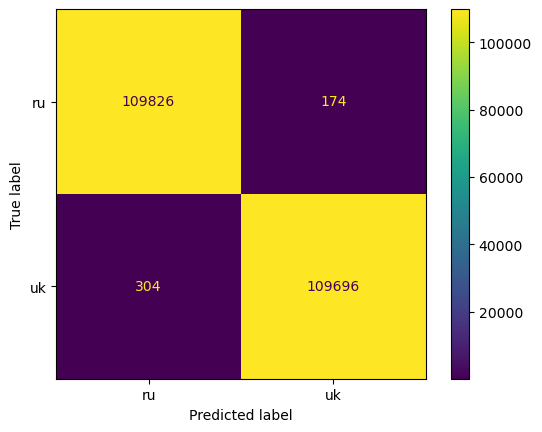

In [20]:
ConfusionMatrixDisplay.from_predictions(geo_light['lang'], geo_light['lang_pred_mod'])

In [21]:
wrong = (geo_light[geo_light['lang'] != geo_light['lang_pred_mod']]).copy()
wrong

text loc_markers  \
270     –ö–∏—Ä–∏–ª–æ –®–µ–≤—á–µ–Ω–∫–æ –ø–µ—Ä–µ–±—É–≤–∞—Ç–∏–º–µ —É –°–®–ê —É–ø—Ä–æ–¥–æ–≤–∂ 8-...  [(31, 34)]   
906     ¬´–í –æ—Å–Ω–æ–≤–Ω–æ–º—É –ª—é–¥–∏ –ø—Ä–æ—Å—Ç–æ –Ω–µ –º–∞—é—Ç—å –±–∞–∂–∞–Ω–Ω—è, ‚Äì –≥...          []   
1313             –í—Å–µ, —â–æ –∑–≤–µ—Ä—Ö —Ç–æ–≥–æ, ‚Äì –¥–æ–¥–∞—Ç–∫–∏, ‚Äú–±–æ–Ω—É—Å–∏‚Äù.          []   
2627    –ê–ª–µ –±—É–ª–æ —Ü–µ –¥–∞–≤–Ω–æ, –∫–æ–ª–∏ —Ö–ª–æ–ø–µ—Ü—å —â–µ –±—É–≤ –º–∞–ª–µ–Ω—å–∫...          []   
3227    ‚Äú–ú–æ–∂–ª–∏–≤–æ, —è –±—É–¥—É –ø–æ–∫–∞—Ä–∞–Ω–∏–π‚Äù, ‚Äì —Å–∫–∞–∑–∞–≤ –ø–∞–Ω –ö—Ä–∏—â...          []   
...                                                   ...         ...   
216299  –ü—Ä–æ–≥—Ä–∞–º–º—É –ö–∞–Ω–Ω—Å–∫–æ–≥–æ –∫–∏–Ω–æ—Ñ–µ—Å—Ç–∏–≤–∞–ª—è –≤ 2013 –≥–æ–¥—É ...          []   
217677                                   –ú–∏—Ç–∏–Ω–≥–∏ 5 –º–∞—Ä—Ç–∞.          []   
217778  –ú—É–∂—á–∏–Ω—É, –Ω–∞–ø–∞–≤—à–µ–≥–æ –Ω–∞ –ø–∞—Å—Å–∞–∂–∏—Ä–∞ –ª–æ–Ω–¥–æ–Ω—Å–∫–æ–π –ø–æ–¥...          []   
218673  –ü–µ–≤–∏—Ü–∞ –ö–æ—Ä—Ç–Ω–∏ –õ–∞–≤ –∑–∞–≤–µ—Ä—à–∏–ª–∞ —Ä–∞–±–æ—Ç—É –Ω–∞–¥ —Å–≤–æ–∏–º–∏ ...          []   
219051  –ë—Ä–∏—Ç–∞–Ω—Å–∫–∞—è –ø–µ–≤–∏—Ü–∞ –ü–∏ –î–∂–µ–π –•–∞—Ä–≤–∏, –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–∞—è ...          []   

        is_valid lang lang_pred lang_pred_mod  
270            0   uk        ru            ru  
906            0   uk        ru            ru  
1313           0   uk        ru            ru  
2627           0   uk        ru            ru  
3227           0   uk        ru            ru  
...          ...  ...       ...           ...  
216299         0   ru        uk            uk  
217677         0   ru        uk            uk  
217778         0   ru        uk            uk  
218673         0   ru        uk            uk  
219051         0   ru        uk            uk  

[478 rows x 6 columns]

In [22]:
wrong.loc[3227].text

'‚Äú–ú–æ–∂–ª–∏–≤–æ, —è –±—É–¥—É –ø–æ–∫–∞—Ä–∞–Ω–∏–π‚Äù, ‚Äì —Å–∫–∞–∑–∞–≤ –ø–∞–Ω –ö—Ä–∏—â–µ–Ω–∫–æ.'

In [23]:
wrong.sample(20, random_state=42)

text loc_markers  \
212758  –ù–∏–∂–Ω—è—è –ø–∞–ª–∞—Ç–∞ –ø–∞—Ä–ª–∞–º–µ–Ω—Ç–∞ –¢–∞–¥–∂–∏–∫–∏—Å—Ç–∞–Ω–∞ –ø—Ä–∏–Ω—è–ª–∞ ...  [(25, 37)]   
15448   –Ø —Ç—Ä–æ—Ö–∏ –∑–∞—Å–º—É—Ç–∏–ª–∞—Å—è, –∞–ª–µ —Ç—É—Ç –Ω–∞ –º–µ–Ω–µ —á–µ–∫–∞–≤ —Å—é—Ä...          []   
53472   –©–µ —Ç–∞–∫–æ–≥–æ –Ω–µ –±–∞—á–∏–≤ –Ω–∞ –∫—ã–ª—å—Ü—è—Ö –æ–±—Ç—è–≥–Ω—É–ª–∏ —Å—Ç—Ä—ã—á–∫...          []   
30799   –ü—Ä–æ —Ü–µ –ø–∏—à–µ –∞–º–µ—Ä–∏–∫–∞–Ω—Å—å–∫–µ –≤–∏–¥–∞–Ω–Ω—è The Washingto...          []   
31911         –û—á–µ–≤–∏–¥–Ω–æ, —â–æ —Ç–æ –±—É–ª–∞ –ª–∏—à–µ —Å–ø—Ä–æ–±–∞ –±–ª–µ—Ñ—É–≤–∞—Ç–∏.          []   
46311   –ü—Ä–∏–Ω—Ü–µ—Å–∞ –®–∞—Ä–ª–æ—Ç–∞ —Ç–∞ –ø—Ä–∏–Ω—Ü –î–∂–æ—Ä–¥–∂ –ø–µ—Ä–µ–¥ —à–∫–æ–ª–æ—é ...          []   
100530    –¢–µ —Å–∞–º–µ –∑ –º–æ—Ä–∫–≤–æ—é, —è–±–ª—É–∫–∞–º–∏, –∫–≤–∞—à–µ–Ω–æ—é –∫–∞–ø—É—Å—Ç–æ—é.          []   
68955   –Ø –Ω–µ –≤—Å—Ç–∏–≥–∞—é –∑–∞ —Ü–∏–º –ø—É—Ö–Ω–∞—Å—Ç–∏–º", - –Ω–∞–ø–∏—Å–∞–ª–∞ "—Ö–æ...          []   
94854   –£ –º–µ–Ω–µ –ø–µ—Ä–µ–¥ –æ—á–∏–º–∞ –∫–∞—Ä—Ç–∏–Ω–∫–∞ –¢–∏–º–æ—à–µ–Ω–∫–æ-–Æ—â–µ–Ω–∫–æ, ...          []   
5449           –•–æ—á–∞ —Ü–µ –π –ø—Ä–∏–∫—Ä–æ, –∞–ª–µ —Ç–∞–∫–∏–º –Ω–µ –≤–±–∏—Ç–∏ –º–µ–Ω–µ.          []   
119279  Universal Home Entertainment –Ω–∞–º–µ—Ä–µ–Ω–∞ –ø–µ—Ä–µ–∏–∑–¥–∞...          []   
181451  –ù–∞ –∑–∞–ø–∞–¥–µ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω–∞ –º–∏–∫—Ä–æ–∞–≤—Ç–æ–±—É—Å "–û–ø–µ–ª—å" —Å—Ç–æ–ª...  [(10, 20)]   
107201       "–£–ø–µ—Ä—à–µ –ú–∞—Ä—à —Å–ª–∞–≤–∏ –£–ü–ê –º–∏ –ø—Ä–æ–≤–µ–ª–∏ 2005 —Ä–æ–∫—É.          []   
203416                                   –ú–∏—Ç–∏–Ω–≥–∏ 5 –º–∞—Ä—Ç–∞.          []   
32595     –°–∞–º–µ —Ç–∞–º –∞–ø–æ—Å—Ç–æ–ª–∞–º –∑'—è–≤–∏–≤—Å—è –≤–æ—Å–∫—Ä–µ—Å–ª–∏–π –•—Ä–∏—Å—Ç–æ—Å.          []   
187711  –í –ú–æ—Å–∫–≤–µ –∂–µ–Ω—â–∏–Ω–∞ –Ω–∞ —Ä–æ–∑–æ–≤–æ–º Jaguar –∑–∞–¥–∞–≤–∏–ª–∞ –º—É...    [(2, 8)]   
12504   –ê —Ç–æ–º—É —Ç–æ–π, —Ö—Ç–æ –Ω–µ –ø–µ—Ä–µ—Ö–æ–¥–∏—Ç—å, ‚Äî —á–∏ —Ç–æ "–∑—Ä–∞–¥–Ω–∏...          []   
41634   –ú–∞–π–∫–æ–Ω –ø—Ä–∏–π–Ω—è–≤ —É—á–∞—Å—Ç—å –ª–∏—à–µ –≤ 4 –º–∞—Ç—á–∞—Ö –£–ü–õ-2019...          []   
171007  –§–µ–¥–µ—Ä–∞–ª—å–Ω–∞—è –∞–Ω—Ç–∏–º–æ–Ω–æ–ø–æ–ª—å–Ω–∞—è —Å–ª—É–∂–±–∞ (–§–ê–°) –Ω–∞—á–∞–ª...  [(80, 95)]   
68150          –°–∏–ª—å–Ω–∏–π, –∞ –Ω–µ —Å–ª–∞–±–∞–∫", - –∑–∞—è–≤–∏–≤ –ü–æ—Ä–æ—à–µ–Ω–∫–æ.          []   

        is_valid lang lang_pred lang_pred_mod  
212758         0   ru        uk            uk  
15448          0   uk        ru            ru  
53472          0   uk        ru            ru  
30799          0   uk        ru            ru  
31911          0   uk        ru            ru  
46311          0   uk        ru            ru  
100530         1   uk        ru            ru  
68955          0   uk        ru            ru  
94854          0   uk        ru            ru  
5449           0   uk        ru            ru  
119279         0   ru        uk            uk  
181451         0   ru        uk            uk  
107201         1   uk        ru            ru  
203416         0   ru        uk            uk  
32595          0   uk        ru            ru  
187711         0   ru        uk            uk  
12504          0   uk        ru            ru  
41634          0   uk        ru            ru  
171007         0   ru        uk            uk  
68150          0   uk        ru            ru

In [24]:
for i, text in enumerate(wrong.sample(20, random_state=42).text):
    print(i, text)

0 –ù–∏–∂–Ω—è—è –ø–∞–ª–∞—Ç–∞ –ø–∞—Ä–ª–∞–º–µ–Ω—Ç–∞ –¢–∞–¥–∂–∏–∫–∏—Å—Ç–∞–Ω–∞ –ø—Ä–∏–Ω—è–ª–∞ –∑–∞–∫–æ–Ω–æ–ø—Ä–æ–µ–∫—Ç –æ–± –∞–º–Ω–∏—Å—Ç–∏–∏.
1 –Ø —Ç—Ä–æ—Ö–∏ –∑–∞—Å–º—É—Ç–∏–ª–∞—Å—è, –∞–ª–µ —Ç—É—Ç –Ω–∞ –º–µ–Ω–µ —á–µ–∫–∞–≤ —Å—é—Ä–ø—Ä–∏–∑!
2 –©–µ —Ç–∞–∫–æ–≥–æ –Ω–µ –±–∞—á–∏–≤ –Ω–∞ –∫—ã–ª—å—Ü—è—Ö –æ–±—Ç—è–≥–Ω—É–ª–∏ —Å—Ç—Ä—ã—á–∫–æ–º–∏ –∑–∞–º—ã—Å—Ç—å —Ç–æ–≥–æ –∞–±–∏ –∑–∞–ª–∞—Ç–∞—Ç–∏.
3 –ü—Ä–æ —Ü–µ –ø–∏—à–µ –∞–º–µ—Ä–∏–∫–∞–Ω—Å—å–∫–µ –≤–∏–¥–∞–Ω–Ω—è The Washington Post.
4 –û—á–µ–≤–∏–¥–Ω–æ, —â–æ —Ç–æ –±—É–ª–∞ –ª–∏—à–µ —Å–ø—Ä–æ–±–∞ –±–ª–µ—Ñ—É–≤–∞—Ç–∏.
5 –ü—Ä–∏–Ω—Ü–µ—Å–∞ –®–∞—Ä–ª–æ—Ç–∞ —Ç–∞ –ø—Ä–∏–Ω—Ü –î–∂–æ—Ä–¥–∂ –ø–µ—Ä–µ–¥ —à–∫–æ–ª–æ—é - —Ñ–æ—Ç–æ - –ì–ª–∞–º—É—Ä - TCH.
6 –¢–µ —Å–∞–º–µ –∑ –º–æ—Ä–∫–≤–æ—é, —è–±–ª—É–∫–∞–º–∏, –∫–≤–∞—à–µ–Ω–æ—é –∫–∞–ø—É—Å—Ç–æ—é.
7 –Ø –Ω–µ –≤—Å—Ç–∏–≥–∞—é –∑–∞ —Ü–∏–º –ø—É—Ö–Ω–∞—Å—Ç–∏–º", - –Ω–∞–ø–∏—Å–∞–ª–∞ "—Ö–æ–ª–æ—Å—Ç—è—á–∫–∞".
8 –£ –º–µ–Ω–µ –ø–µ—Ä–µ–¥ –æ—á–∏–º–∞ –∫–∞—Ä—Ç–∏–Ω–∫–∞ –¢–∏–º–æ—à–µ–Ω–∫–æ-–Æ—â–µ–Ω–∫–æ, –Æ—â–µ–Ω–∫–æ-–¢–∏–º–æ—à–µ–Ω–∫–æ.
9 –•–æ—á–∞ —Ü–µ –π –ø—Ä–∏–∫—Ä–æ,

## Lang detection on test

In [25]:
df_test = pd.read_csv("../data/nlp-ua-locations-extractions/test.csv")

In [26]:
df_test['lang_pred'] = df_test['text'].progress_apply(lambda x: langid.classify(x)[0])

  0%|          | 0/477 [00:00<?, ?it/s]

In [27]:
df_test['lang_pred_mod'] = df_test.apply(lambda row: 'uk' if contains_uk_letters(row['text']) else row['lang_pred'], axis=1)

In [28]:
df_test[df_test['lang_pred'] == 'ru']

text_id                                               text locations  \
6          6  üëÄ\n\n–ú–æ–∂–µ–º–æ –ë–ü–õ–ê –ø—Ä–∏—Å–ª–∞—Ç–∏ üòÄ\n\n–ü—Å–∫–æ–≤ –±–æ–º–±–∏—Ç—å –ë...        []   
15        15                                          –©–µ –ª–µ—Ç–∏—Ç—å        []   
27        27                 üëÇ–•–æ—Ç–∏–º —Ç–µ—Å—Ç–∏—Ç—å —ç–∫–æ—Ñ–ª–æ—É –∏ —Å—Ç–∞—Ä–ª–∏–Ω–∫.        []   
29        29  üëÇ–ù–∞ –î–º–∏—Ç—Ä–æ–≤—Å–∫–æ–π –ø–æ —Å—Ç–∞—Ä–æ–π —Å—Ö–µ–º–µ –ª–∏–∫–≤–∏–¥–∏—Ä–æ–≤–∞–ª–∏ ...        []   
31        31  –ì–æ—Ä–∏—Ç –∑–∞–±—Ä–æ—à–µ–Ω–Ω—ã–π –ø–æ–ª—É—Ä–∞–∑–≤–∞–ª–∏–≤—à–∏–π—Å—è –¥–æ–º\n\n–°–æ–æ...        []   
53        53  –° 28 –∞–≤–≥—É—Å—Ç–∞ –≤ –ë–µ–ª–æ—Ü–µ—Ä–∫–æ–≤—Å–∫–æ–π –æ–±—â–∏–Ω–µ –∞–ª–∫–æ–≥–æ–ª—å ...        []   
54        54       –í –õ–∞–≤—Ä—ñ –æ–±–∏—Ä–∞—é—Ç—å –Ω–æ–≤–æ–≥–æ –ü–∞–ø—É, —á–∏ –Ω–∞—Å—Ç–æ—è—Ç–µ–ª—è?        []   
57        57  –ù–∞–π–¥–µ–Ω–∞ —Å–æ–±–∞–∫–∞ <–∫–æ—Ä–≥–µ> –∑–∞–±–µ–∂–∞–ª–∞ –≤ –º–∞—Ä—à—Ä—É—Ç–∫—É –Ω–∞...        []   
84        84  –¢–∞–∫ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ —É–∫—Ä—ã—Ç–∏–µ –∫ 1 —Å–µ–Ω—Ç—è–±—Ä—è –≤ –ù–∞—Ü–∏–æ–Ω–∞...        []   
94        94  –ù–∞ –¥–Ω—è—Ö –Ω–∞—à–∏ –±–æ–π—Ü—ã –∏–∑ –ó–†–ö "–°—Ç–∏–Ω–≥–µ—Ä" —Å–±–∏–ª–∏ –∫—Ä—ã–ª...        []   
96        96  üëÇ–ë–ª–æ–≥–µ—Ä—à–∞ –î–∞—à–∞ –ö–≤–∏—Ç–∫–æ–≤–∞ –≤–ø–∏–Ω–¥—é—Ä–∏–ª–∞—Å—å –Ω–∞ –õ–µ–∫—Å—É—Å...        []   
98        98  #–Ω–∞–º–ø–∏—à—É—Ç –Ω–∞ –¢—Ä–æ–µ—â–∏–Ω–µ –º–∞–Ω—å—è–∫ –∑–∞–±—Ä–∞–ª –∂–∏–∑–Ω–∏ —É–∂–µ ...        []   
101      101  –í –±–ª–∏–∂–∞–π—à–µ–µ –≤—Ä–µ–º—è –∏ –¥–æ –∫–æ–Ω—Ü–∞ —Å—É—Ç–æ–∫, –∞ —Ç–∞–∫–∂–µ –Ω–æ...        []   
118      118  ¬´–£–ó¬ª –Ω–∞–∑–Ω–∞—á–∏–ª–∞ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–≥–æ—Ä–æ–¥–Ω—ã–µ –ø–æ–µ–∑...        []   
120      120  –Æ–≥–æ-–ó–∞–ø–∞–¥–Ω–∞—è –ñ/–î —Å 1 –ø–æ 30 —Å–µ–Ω—Ç—è–±—Ä—è –Ω–∞–∑–Ω–∞—á–∏—Ç –¥...        []   
131      131  –° 1 —Å–µ–Ω—Ç—è–±—Ä—è –ø–æ –∫–æ–Ω–µ—Ü –∏—é–Ω—è –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–π —Ç—Ä–∞–Ω—Å–ø...        []   
134      134  üëÇ–ü–∞—à–∏–Ω–Ω–∞—è —Ä—É–ª–∏—Ç. –°–ª–∞–¥–∫–∏–π –≥–æ–ª–æ—Å, –æ—Å—Ç—Ä—ã–π —è–∑—ã–∫. –ú...        []   
143      143  ‚ùóÔ∏è–í –†–∞–¥–µ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∏ –∑–∞–∫–æ–Ω–æ–ø—Ä–æ–µ–∫—Ç –æ–± –æ—Ç–º–µ...        []   
144      144  üëÇ–í–∏—Ç–∞–ª–∏–∫, –ª—é–¥–∏ —Å –°—ã—Ä—Ü–∞ —É—Å—Ç–∞–ª–∏ –∂–¥–∞—Ç—å –≥–æ—Ä—è—á—É—é –≤–æ...        []   
150      150                         üëÇ–î–æ—Å—Ç–∞–ª–æ –ª–µ—Ç–æ, —Ö–æ—Ç–∏–º –∑–∏–º—É.        []   
187      187                     –û—Å–æ–∫–æ—Ä–∫–∏, –õ–æ—Å –°–æ–ª–æ–º–∞—Å –¥—è–∫—É—îü´Çüí™üèº        []   
190      190   ¬´–ü–µ—Ä—à–æ—Ç—Ä–∞–≤–µ–Ω—å¬ª –Ω–∞ –ø–ª. –ö–∞–ªi–Ωi–Ω–∞ (–ú–∞–π–¥–∞–Ω), 1970-—Çi        []   
195      195  –í–æ–∑–≥–æ—Ä–∞–Ω–∏–µ –≤–æ–∑–Ω–∏–∫–ª–æ –Ω–∞ —É–ª. –î–∏–º–∏—Ç—Ä–æ–≤—Å–∫–∞—è, 4 –≤ –æ...        []   
206      206  üëÇ–†—É—Å–Ω—è –º–∏–Ω–∏—Ä—É–µ—Ç —à–∫–æ–ª—ã –≤ –ö–∏–µ–≤–µ –∑–≤–æ–Ω–∫–∞–º–∏.\n\nüëÇ–¢—É...        []   
207      207  –í—á–µ—Ä–∞ –≤ –ö–∏–µ–≤–µ —Å–ø–∞—Å–ª–∏ "–ë—ç—Ç–º–µ–Ω–∞", –ø—ã—Ç–∞–≤—à–µ–≥–æ—Å—è –ø–µ...        []   
215      215  –°–ë–£ —Å–æ–æ–±—â–∏–ª–∞ –æ –ø–æ–¥–æ–∑—Ä–µ–Ω–∏–∏ –∫–∏–µ–≤—Å–∫–æ–º—É –±–∏–∑–Ω–µ—Å–º–µ–Ω—É...        []   
236      236  –í –ö–∏–µ–≤—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏ –ø–æ–≥–∏–± 4-–ª–µ—Ç–Ω–∏–π –º–∞–ª—å—á–∏–∫: –µ–≥–æ...        []   
249      249  –°–µ–≥–æ–¥–Ω—è –ø–æ–≥–æ–≤–æ—Ä–∏–º –æ–± —É–¥–∞—Ä–Ω–æ–π –∫–æ—Ä—Ä—É–ø—Ü–∏–∏. –ú–Ω–æ–≥–æ ...        []   
256      256  ‚ö°Ô∏è–°—É–¥ –∏–∑–±—Ä–∞–ª –º–µ—Ä—É –ø—Ä–µ—Å–µ—á–µ–Ω–∏—è –ò–≥–æ—Ä—é –ö–æ–ª–æ–º–æ–π—Å–∫–æ–º...        []   
259      259                            üòÄüòÄüòÄ\n\n@lossolomas_kyiv        []   
264      264                                     –ë—Ä—è–Ω—Å–∫, —à–æ —Ç–∏?        []   
268      268  –£–Ω–∏—á—Ç–æ–∂–µ–Ω—ã –≤—Å–µ 28 –∫—Ä—ã–ª–∞—Ç—ã—Ö —Ä–∞–∫–µ—Ç –∏ 15 –∏–∑ 16 —É–¥...        []   
274      274                               –ë–†–Ø–ù–°–¨–ö, –ù–ï –°–ü–ê–¢–ò! üòÄ        []   
276      276                                        –°–∫–æ—Ä–æ—Å—Ç—Ä–µ–ª—ã        []   
292      292   –ü–æ—Å–ª–µ–¥–Ω–∏–µ –¥–µ–Ω—å–∫–∏ –ª–µ—Ç–∞ –æ–∂–∏–¥–∞—é—Ç—Å—è –¥–æ–≤–æ–ª—å–Ω–æ –∂–∞—Ä–∫–∏–º–∏        []   
301      301  ‚ùóÔ∏è–í –£–∫—Ä–∞–∏–Ω–µ –±—É–¥—É—Ç –º–æ–±–∏–ª

## Lingua

In [60]:
from lingua import Language, LanguageDetectorBuilder
languages = [Language.UKRAINIAN, Language.RUSSIAN]
detector = LanguageDetectorBuilder.from_languages(*languages).build()

In [61]:
def contains_uk_letters(input_string):
    ukrainian_letters = "—ó—ñ—î“ë"
    ukrainian_letters_uppercase = ukrainian_letters.upper()
    pattern = re.compile(f"[{ukrainian_letters}{ukrainian_letters_uppercase}]")
    return bool(pattern.search(input_string))

In [62]:
def contains_ru_letters(input_string):
    ru_letters = "—ã—ä—ç—ë"
    ru_letters_uppercase = ru_letters.upper()
    pattern = re.compile(f"[{ru_letters}{ru_letters_uppercase}]")
    return bool(pattern.search(input_string))

In [63]:
import re

def detect_lang(text):
    if contains_uk_letters(text):
        return 'uk'
    elif contains_ru_letters(text):
        return 'ru'
    else:
        return 'uk' if detector.detect_language_of(text) == Language.UKRAINIAN else 'ru'

In [52]:
geo_light["lang_pred_lingua"] = geo_light['text'].parallel_apply(detect_lang)

/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

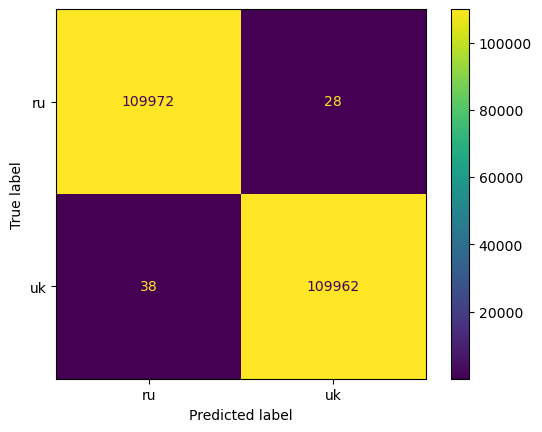

In [53]:
ConfusionMatrixDisplay.from_predictions(geo_light['lang'], geo_light['lang_pred_lingua'])

In [54]:
wrong = geo_light.loc[geo_light['lang'] != geo_light['lang_pred_lingua']]

In [55]:
wrong[['text', 'lang', 'lang_pred_lingua']]

text lang  \
5875          –ì–æ–ª–æ–≤–Ω–µ –≤—á–∞—Å–Ω–æ –≤—Å–µ –ø–æ—Å—Ç–∞–≤–∏—Ç–∏, —â–æ–± —Å–ø–µ–∫–ª–æ—Å—å.   uk   
7648      –§–æ—Ç–æ –∞–≤—Ç–æ—Ä–∞ —Ç–∞ –∑ —Å–∞–π—Ç—É –õ–∞–π–æ–Ω–µ–ª–∞ –¥–µ –õ–∞–Ω–∂–∞ (–ü–ê–†).   uk   
15914   –ì–æ–ª–æ–≤–Ω–µ, –Ω–µ –ø—Ä–æ–¥–∞–≤–∞–π—Å—è –≤–µ–ª–∏–∫–∏–º –ø—Ä–æ–¥—é—Å–µ—Ä–∞–º –∑ –ú–æ...   uk   
18570   –ü–æ–¥–∫–∞—Å—Ç —à–µ—Ñ-—Ä–µ–¥–∞–∫—Ç–æ—Ä–∞ –∂—É—Ä–Ω–∞–ª—É XXL –î–º–∏—Ç—Ä–∞ –ú–∞–∫—Å—é...   uk   
18637        –ù–µ —Ç–µ, —â–æ–± –Ω–∞—Ä–∏–≤–∞–ª–∏—Å—å, –∞–ª–µ —Ç–æ—á–Ω–æ –Ω–µ –±–æ—è—Ç—å—Å—è.   uk   
...                                                   ...  ...   
181053                            CD-ROM "–í–ª–∞–¥–∏–º–∏—Ä –ü—É—Ç–∏–Ω.   ru   
187232  –í–µ–¥—É—â–∞—è –ø—Ä–æ–≥—Ä–∞–º–º—ã –Ω–æ–≤–æ—Å—Ç–µ–π ¬´–°–≤—ñ–¥–æ–∫¬ª —É–∫—Ä–∞–∏–Ω—Å–∫–æ–≥...   ru   
195715  –ò—Ç–∞–ª—å—è–Ω—Å–∫–∏–π –±—Ä–µ–Ω–¥ –æ–±—É–≤–∏ –∏ –∞–∫—Å–µ—Å—Å—É–∞—Ä–æ–≤ Santoni ...   ru   
197857  –ü—Ä–µ–∑–∏–¥–µ–Ω—Ç –°–®–ê –î–æ–Ω–∞–ª—å–¥ –¢—Ä–∞–º–ø ¬´–ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏—Ç —Å–∞–º ...   ru   
207559                                                –í–ú–°   ru   

       lang_pred_lingua  
5875                 ru  
7648                 ru  
15914                ru  
18570                ru  
18637                ru  
...                 ...  
181053               uk  
187232               uk  
195715               uk  
197857               uk  
207559               uk  

[66 rows x 3 columns]

In [64]:
df_test['lang_pred_lingua_mod'] = df_test['text'].parallel_apply(detect_lang)

In [65]:
df_test[['text', 'lang_pred_mod', 'lang_pred_lingua_mod']].to_csv("lang_pred_review.csv", index=None)

In [66]:
df_test.loc[df_test['lang_pred_mod'] != df_test['lang_pred_lingua_mod']]

text_id                                               text locations  \
6          6  üëÄ\n\n–ú–æ–∂–µ–º–æ –ë–ü–õ–ê –ø—Ä–∏—Å–ª–∞—Ç–∏ üòÄ\n\n–ü—Å–∫–æ–≤ –±–æ–º–±–∏—Ç—å –ë...        []   
190      190   ¬´–ü–µ—Ä—à–æ—Ç—Ä–∞–≤–µ–Ω—å¬ª –Ω–∞ –ø–ª. –ö–∞–ªi–Ωi–Ω–∞ (–ú–∞–π–¥–∞–Ω), 1970-—Çi        []   
274      274                               –ë–†–Ø–ù–°–¨–ö, –ù–ï –°–ü–ê–¢–ò! üòÄ        []   
450      450                                –û—Ä–ª–æ–≤—Å—å–∫–∞ –æ–±–ª–∞—Å—Ç—å üëÄ        []   

    lang_pred lang_pred_mod lang_pred_lingua_mod  
6          ru            ru                   uk  
190        ru            ru                   uk  
274        ru            ru                   uk  
450        ru            ru                   uk

## Gcld3

In [ ]:
def contains_uk_letters(input_string):
    ukrainian_letters = "—ó—ñ—î“ë"
    ukrainian_letters_uppercase = ukrainian_letters.upper()
    pattern = re.compile(f"[{ukrainian_letters}{ukrainian_letters_uppercase}]")
    return bool(pattern.search(input_string))

In [ ]:
def contains_ru_letters(input_string):
    ru_letters = "—ã—ä—ç—ë"
    ru_letters_uppercase = ru_letters.upper()
    pattern = re.compile(f"[{ru_letters}{ru_letters_uppercase}]")
    return bool(pattern.search(input_string))

In [ ]:
import re

def detect_lang(text):
    if contains_uk_letters(text):
        return 'uk'
    elif contains_ru_letters(text):
        return 'ru'
    else:
        return 'uk' if detector.detect_language_of(text) == Language.UKRAINIAN else 'ru'